In [1]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv(r"D:\IT-job-analysis-VN\data_clean\clean_data.csv")

NameError: name 'pd' is not defined

In [3]:
# đọc hiểu dữ liệu

df.info()

NameError: name 'df' is not defined

# nhóm công việc phổ biến nhất trong thị trường

## tìm hiểu về thông tin các nhóm công việc phổ biến:
- Backend Developer: Backend Developer là lập trình viên chịu trách nhiệm xây dựng và vận hành phần phía sau của website hoặc ứng dụng — nơi xử lý dữ liệu, logic, bảo mật và kết nối với database. Họ đảm bảo hệ thống chạy ổn định, nhanh và an toàn.
- QA / Tester:  
    + QA (Quality Assurance): Người đảm bảo chất lượng sản phẩm phần mềm. Họ xây dựng quy trình, tiêu chuẩn và kế hoạch để sản phẩm đạt chất lượng cao nhất.
    + Tester (Software Tester): Người trực tiếp kiểm thử phần mềm, tìm lỗi (bug), ghi nhận lỗi và gửi cho lập trình viên sửa.
- Data / AI: Nhóm công việc liên quan đến dữ liệu và trí tuệ nhân tạo.
    + Data Analyst: Phân tích dữ liệu để rút ra thông tin hữu ích hỗ trợ quyết định kinh doanh.
    + Data Scientist: Xây dựng mô hình dự đoán, khai thác dữ liệu lớn (big data) sử dụng machine learning.
    + Data Engineer: Xây dựng hệ thống thu thập và xử lý dữ liệu.
    + AI Engineer / ML Engineer: Xây dựng hệ thống AI thông minh như chatbot, gợi ý, nhận diện hình ảnh.
- Fullstack Developer: Lập trình viên có thể làm cả Frontend (giao diện) và Backend (xử lý logic). Họ xây dựng toàn bộ chức năng của một ứng dụng web từ đầu đến cuối.
- DevOps / Cloud: Nhóm công việc tập trung vào vận hành hệ thống, tự động hóa và triển khai ứng dụng.
    + DevOps Engineer: Tự động hóa build, test, deploy, giám sát hệ thống
    + Cloud Engineer: Làm việc với hạ tầng cloud (AWS, Azure, GCP), triển khai và tối ưu tài nguyên.
- ERP / Enterprise Systems: Làm việc với các hệ thống quản lý doanh nghiệp như SAP, Oracle, Odoo. Công việc liên quan phân tích nghiệp vụ, cấu hình module, triển khai hệ thống ERP cho doanh nghiệp.
- Game: Nhóm công việc phát triển trò chơi.
    + Game Developer: Lập trình game (Unity, Unreal Engine).
    + Game Designer: Thiết kế gameplay, cơ chế, nhân vật, cốt truyện.
    + 3D Artist: Vẽ mô hình 3D, đồ họa, hoạt họa.
- Manager / Lead: Các vị trí quản lý và dẫn dắt đội ngũ kỹ thuật.
    + Team Lead: Dẫn dắt nhóm kỹ thuật.
    + Project Manager: Quản lý dự án, thời gian, chi phí.
    + Product Manager: Định hướng tính năng sản phẩm, hiểu nhu cầu người dùng.
- UX/UI Designer: Thiết kế trải nghiệm người dùng (UX) và giao diện trực quan (UI) cho ứng dụng, website. Tập trung vào bố cục, màu sắc, tính dễ dùng, hành vi người dùng.
- Frontend Developer: Lập trình giao diện người dùng – phần người dùng nhìn thấy và tương tác. Dùng HTML, CSS, JavaScript và các framework như React, Vue, Angular.
- Embedded / Firmware: Làm việc với phần mềm chạy trên thiết bị phần cứng như IoT, robot, thiết bị y tế, bộ điều khiển. Dùng C/C++, vi điều khiển, hệ thống nhúng.
- Security / Cybersecurity: Bảo mật hệ thống, phát hiện lỗ hổng, ngăn tấn công mạng. Bao gồm các vai trò như:
    + Security Analyst: Phân tích rủi ro bảo mật.
    + Penetration Tester: Thử xâm nhập hệ thống để tìm lỗ hổng.
    + Security Engineer: Xây dựng hệ thống bảo mật.
    + SOC Analyst: Giám sát an ninh mạng.
- Other: Các nhóm công việc khác không thuộc các nhóm trên.

In [4]:
value_counts = df['job_group'].value_counts()

plt.figure(figsize=(20, 10))
value_counts.plot(kind='barh')  # no specific colors set
plt.xlabel("job_group")
plt.ylabel('Count')
plt.title('Value Counts of Column: job_group')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

## nhận xét:
- nhóm công việc được tuyển dụng nhiều nhất là backend developer trên thị trường, tiếp đến là manager/lead và data/ai
- ít nhất là nhóm lập trình nhúng, firmware  
==> nhận thấy: nhóm công việc ít cạnh tranh thì sẽ có ít nhu cầu tuyển dụng hơn. tương tự, nhóm có nhu cầu tuyển dụng cao thì sẽ có nhiều ứng viên cạnh tranh hơn

In [5]:
# Loại bỏ level = "Unknown"
df_filtered = df[df['level'] != "Unknown"]

# Group lại
grouped = df_filtered.groupby(['job_group', 'level']).size().unstack(fill_value=0)

# Vẽ biểu đồ
grouped.plot(kind='bar', figsize=(20, 10))
plt.xlabel("job_group")
plt.ylabel("Count")
plt.title("Value Counts of job_group grouped by level (excluded Unknown)")
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

## nhận xét:

## tìm hiểu về thông tin các nhóm công việc theo level từ cao đến thấp:
- Backend Developer: Tuyển mạnh ở junior, mid, senior, và đặc biệt senior đang cao nhất.
==> Cho thấy các công ty đang cần đội ngũ backend giàu kinh nghiệm để xây dựng hệ thống cốt lõi.
- Data / AI: Tuyển nhiều ở junior, mid, và senior.
==> Dữ liệu & AI đang là xu hướng, nhu cầu thị trường rất mạnh.
- QA / Tester: Tuyển vừa phải, tập trung ở junior, mid.
==> Các công ty đang đẩy mạnh kiểm thử để đảm bảo chất lượng sản phẩm.
- Fullstack Developer: Lượng tuyển khá lớn và đồng đều ở mọi level.
==> Fullstack đang trở thành ưu tiên của nhiều công ty vừa và nhỏ cần engineer đa nhiệm.
- DevOps / Cloud: Tuyển chủ yếu ở senior, mid 
==> đúng đặc thù chuyên môn cao.
- Game: Chủ yếu junior, mid.
- Manager / Lead: Tuyển mạnh ở level lead, mid, senior.
==> Cho thấy thị trường đang mở rộng, cần người quản lý và dẫn dắt team.
- UX/UI Designer: Chủ yếu ở junior và mid.
- Frontend Developer: Tuyển nhiều nhất ở junior và mid.
- Security / Cybersecurity: Chủ yếu tuyển senior, đúng mô hình ngành bảo mật (ưu tiên kinh nghiệm cao).

In [6]:
df_backend = df[df['job_group'] == "Backend Developer"]

# 1. Top 10 Programming Languages
counter_lang = Counter()

for row in df_backend['programming_languages']:
    try:
        langs = ast.literal_eval(row)
        counter_lang.update(langs)
    except:
        pass

top_10_lang = counter_lang.most_common(10)
labels = [item[0] for item in top_10_lang]
sizes  = [item[1] for item in top_10_lang]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Programming Languages (Backend Developer)")
plt.show()

# 2. Top 10 Frameworks
counter_fw = Counter()

for row in df_backend['frameworks']:
    try:
        items = ast.literal_eval(row)
        counter_fw.update(items)
    except:
        pass

top_10_fw = counter_fw.most_common(10)
labels = [item[0] for item in top_10_fw]
sizes  = [item[1] for item in top_10_fw]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Frameworks (Backend Developer)")
plt.show()

# 3. Top 10 Tools
counter_tools = Counter()

for row in df_backend['tools']:
    try:
        items = ast.literal_eval(row)
        counter_tools.update(items)
    except:
        pass

top_10_tools = counter_tools.most_common(10)
labels = [item[0] for item in top_10_tools]
sizes  = [item[1] for item in top_10_tools]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Tools (Backend Developer)")
plt.show()

NameError: name 'df' is not defined

## nhận xét:
- ở nhóm backend developer:
    + nhu cầu tuyển dụng việc làm yêu cầu ngôn ngữ lập trình nhiều nhất là Java, tiếp đến là SQL và python, các ngôn ngữ khác chiếm phần nhỏ hơn
    + nhu cầu tuyển dụng việc làm yêu cầu framework nhiều nhất là Spring Boot, tiếp đến là Spring và .NET, các framework khác chiếm phần nhỏ hơn
    + nhu cầu tuyển dụng việc làm yêu cầu tool nhiều nhất là AWS, tiếp đến là MýQL và API, các tool khác chiếm phần nhỏ hơn

In [7]:
df_backend = df[df['job_group'] == "QA / Tester"]

# 1. Top 10 Programming Languages
counter_lang = Counter()

for row in df_backend['programming_languages']:
    try:
        langs = ast.literal_eval(row)
        counter_lang.update(langs)
    except:
        pass

top_10_lang = counter_lang.most_common(10)
labels = [item[0] for item in top_10_lang]
sizes  = [item[1] for item in top_10_lang]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Programming Languages (QA / Tester)")
plt.show()

# 2. Top 10 Frameworks
counter_fw = Counter()

for row in df_backend['frameworks']:
    try:
        items = ast.literal_eval(row)
        counter_fw.update(items)
    except:
        pass

top_10_fw = counter_fw.most_common(10)
labels = [item[0] for item in top_10_fw]
sizes  = [item[1] for item in top_10_fw]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Frameworks (QA / Tester)")
plt.show()

# 3. Top 10 Tools
counter_tools = Counter()

for row in df_backend['tools']:
    try:
        items = ast.literal_eval(row)
        counter_tools.update(items)
    except:
        pass

top_10_tools = counter_tools.most_common(10)
labels = [item[0] for item in top_10_tools]
sizes  = [item[1] for item in top_10_tools]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Tools (QA / Tester)")
plt.show()

NameError: name 'df' is not defined

## nhận xét:
- ở nhóm QA / Tester:
    + nhu cầu tuyển dụng việc làm yêu cầu 4 ngôn ngữ lập trình chủ yếu là Java, tiếp đến là JavaScript, Python và SQL, các ngôn ngữ khác chiếm phần nhỏ hơn
    + nhu cầu tuyển dụng việc làm yêu cầu chủ yếu 3 framework là Cucumber, tiếp đến là ThreadX và .NET
    + nhu cầu tuyển dụng việc làm yêu cầu tool nhiều nhất là API, tiếp đến là PlaywrightL và Jira, các tool khác chiếm phần nhỏ hơn

In [8]:
df_backend = df[df['job_group'] == "Data / AI"]

# 1. Top 10 Programming Languages
counter_lang = Counter()

for row in df_backend['programming_languages']:
    try:
        langs = ast.literal_eval(row)
        counter_lang.update(langs)
    except:
        pass

top_10_lang = counter_lang.most_common(10)
labels = [item[0] for item in top_10_lang]
sizes  = [item[1] for item in top_10_lang]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Programming Languages (Data / AI)")
plt.show()

# 2. Top 10 Frameworks
counter_fw = Counter()

for row in df_backend['frameworks']:
    try:
        items = ast.literal_eval(row)
        counter_fw.update(items)
    except:
        pass

top_10_fw = counter_fw.most_common(10)
labels = [item[0] for item in top_10_fw]
sizes  = [item[1] for item in top_10_fw]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Frameworks (Data / AI)")
plt.show()

# 3. Top 10 Tools
counter_tools = Counter()

for row in df_backend['tools']:
    try:
        items = ast.literal_eval(row)
        counter_tools.update(items)
    except:
        pass

top_10_tools = counter_tools.most_common(10)
labels = [item[0] for item in top_10_tools]
sizes  = [item[1] for item in top_10_tools]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Tools (Data / AI)")
plt.show()

NameError: name 'df' is not defined

## nhận xét:
- ở nhóm Data / AI:
    + nhu cầu tuyển dụng việc làm yêu cầu ngôn ngữ lập trình chủ yếu là Python, tiếp đến là SQL các ngôn ngữ khác chiếm phần nhỏ hơn
    + nhu cầu tuyển dụng việc làm yêu cầu chủ yếu framework là Pytouch, tiếp đến là Tensorflow
    + nhu cầu tuyển dụng việc làm yêu cầu tool đa dạng gồm AWS, Oracle, Power BI, Azure, Databricks

In [9]:
df_backend = df[df['job_group'] == "Manager / Lead"]

# 1. Top 10 Programming Languages
counter_lang = Counter()

for row in df_backend['programming_languages']:
    try:
        langs = ast.literal_eval(row)
        counter_lang.update(langs)
    except:
        pass

top_10_lang = counter_lang.most_common(10)
labels = [item[0] for item in top_10_lang]
sizes  = [item[1] for item in top_10_lang]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Programming Languages (Manager / Lead)")
plt.show()

# 2. Top 10 Frameworks
counter_fw = Counter()

for row in df_backend['frameworks']:
    try:
        items = ast.literal_eval(row)
        counter_fw.update(items)
    except:
        pass

top_10_fw = counter_fw.most_common(10)
labels = [item[0] for item in top_10_fw]
sizes  = [item[1] for item in top_10_fw]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Frameworks (Manager / Lead)")
plt.show()

# 3. Top 10 Tools
counter_tools = Counter()

for row in df_backend['tools']:
    try:
        items = ast.literal_eval(row)
        counter_tools.update(items)
    except:
        pass

top_10_tools = counter_tools.most_common(10)
labels = [item[0] for item in top_10_tools]
sizes  = [item[1] for item in top_10_tools]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Tools (Manager / Lead)")
plt.show()

NameError: name 'df' is not defined

## nhận xét:
- ở nhóm Manager / Lead:
    + nhu cầu tuyển dụng việc làm yêu cầu ngôn ngữ lập trình chủ yếu là Java, tiếp đến là SQL và Python, các ngôn ngữ khác chiếm phần nhỏ hơn
    + nhu cầu tuyển dụng việc làm yêu cầu chủ yếu framework rất đồng đều gồm .NET, .NET Core, Flutter, Spring
    + nhu cầu tuyển dụng việc làm yêu cầu tool đa dạng gồm Jira, Figma, AWS, MySQL, API, SAP

In [10]:
'''==================================================================================='''

'==================================================================================='

<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
C:\Users\My Computer\AppData\Local\Temp\ipykernel_8032\599340046.py:11: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('Up to \$', '', regex=True)


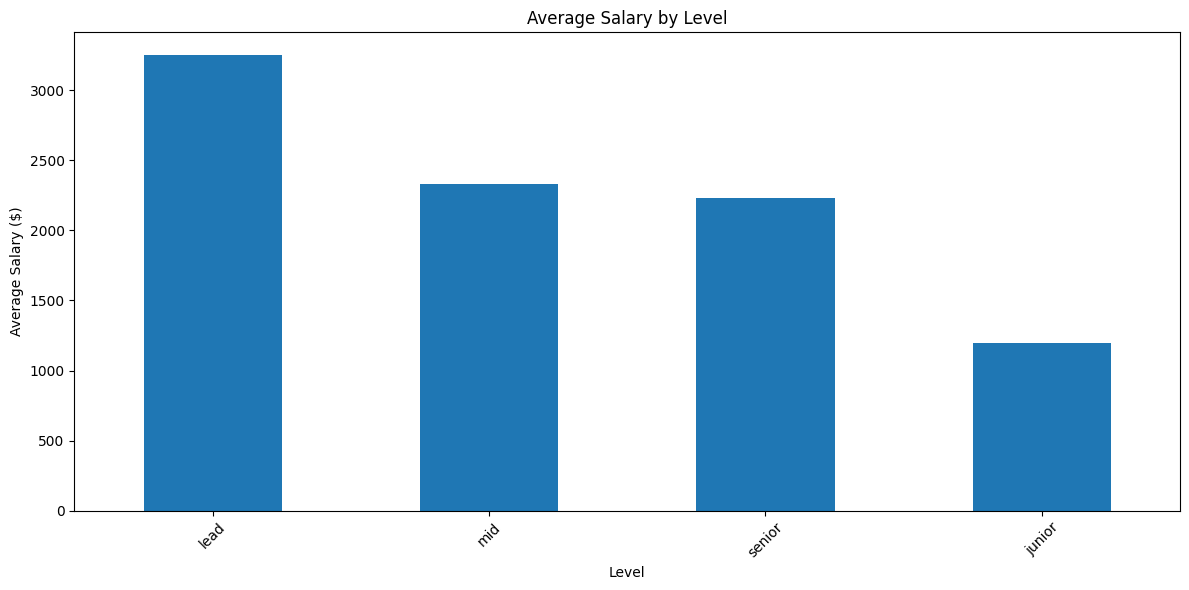

In [11]:
# Tạo bản sao để tránh thay đổi gốc
df_backend = df[df['job_group'] == "Backend Developer"]
df2 = df_backend.copy()
df2 = df2[~((df2['salary'] == 'Up to $2000') & (df2['level'] == 'intern'))]
df2 = df2[~((df2['salary'] == 'Up to $70000') & (df2['level'] == 'lead'))]
df2 = df2[~((df2['salary'] == 'Up to $55000') & (df2['level'] == 'senior'))]
df2 = df2[~((df2['salary'] == 'Up to $7000') & (df2['level'] == 'mid'))]
# Làm sạch cột salary
df2['salary_clean'] = (
    df2['salary']
    .str.replace('Up to \$', '', regex=True)
    .str.replace(',', '', regex=True)
    .replace('Unknown', np.nan)
    .astype(float)
)

# Loại bỏ level Unknown
df2 = df2[df2['level'] != 'Unknown']

# Tính mức lương trung bình theo level
salary_by_level = (
    df2.dropna(subset=['salary_clean'])
       .groupby('level')['salary_clean']
       .mean()
       .sort_values(ascending=False)
)

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
salary_by_level.plot(kind='bar')

plt.xlabel("Level")
plt.ylabel("Average Salary ($)")
plt.title("Average Salary by Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

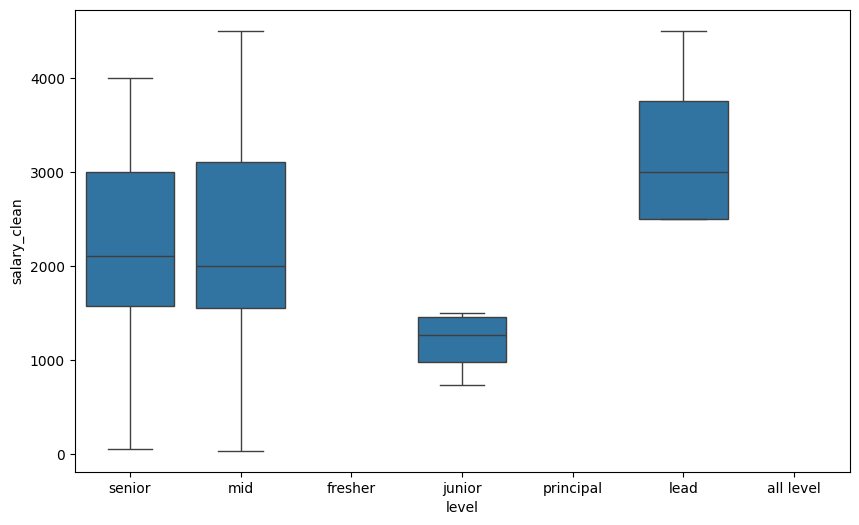

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df2, x='level', y='salary_clean')
plt.show()